In [8]:
import pandas as pd
from pandas import read_csv
from patsy import dmatrices
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [9]:
#filepath ="C:\Users\Jneny\Desktop\820\datasets\icu_beds.csv"
#dataset = pd.read_csv(filepath, header = 0, sep="," )

data = read_csv(r"C:\Users\Jneny\Desktop\820\datasets\icu_beds.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(data))
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 655 entries, 2020-05-01 to 2022-02-14
Data columns (total 10 columns):
adult_icu_crci_patients        655 non-null int64
adult_icu_non_crci_patients    655 non-null int64
available_adult_icu_beds       655 non-null int64
total_adult_icu_patients       655 non-null int64
total_adult_icu_beds           655 non-null int64
ped_icu_crci_patients          655 non-null int64
ped_icu_non_crci_patients      655 non-null int64
available_ped_icu_beds         655 non-null int64
total_ped_icu_patients         655 non-null int64
total_ped_icu_beds             655 non-null int64
dtypes: int64(10)
memory usage: 56.3 KB


,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds
date,,,,,,,,,,
2020-05-01,244,1154,614,1398,2012,0,51,38,51,89
2020-05-02,236,1210,566,1446,2012,0,56,33,56,89
2020-05-03,246,1211,555,1457,2012,0,54,35,54,89
2020-05-04,243,1197,572,1440,2012,0,56,33,56,89
2020-05-05,243,1252,517,1495,2012,0,59,30,59,89


In [10]:
icumax = (data['available_adult_icu_beds'] == 0).sum()
print(icumax)
picumax = (data['available_ped_icu_beds'] == 0).sum()
print(picumax)

0
0


In [11]:
# data.describe(data['adult_icu_crci_patients'])
pd.Series.describe(data['adult_icu_crci_patients'])
pd.Series.describe(data)

,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000
mean,251.783206,1439.909924,557.796947,1691.693130,2249.490076,1.885496,54.928244,35.532824,56.813740,92.346565
std,204.279555,125.563620,147.217516,127.422515,184.996841,2.787700,8.935175,8.423522,8.847094,3.180678
min,18.000000,1065.000000,320.000000,1398.000000,2012.000000,0.000000,34.000000,8.000000,34.000000,89.000000
25%,114.500000,1357.000000,446.000000,1594.000000,2016.000000,0.000000,48.000000,30.000000,51.000000,89.000000
50%,172.000000,1463.000000,531.000000,1692.000000,2319.000000,1.000000,54.000000,36.000000,56.000000,93.000000
75%,349.500000,1540.500000,632.500000,1772.000000,2356.000000,2.000000,61.000000,41.000000,62.000000,93.000000
max,889.000000,1637.000000,980.000000,2038.000000,2554.000000,13.000000,85.000000,55.000000,85.000000,105.000000


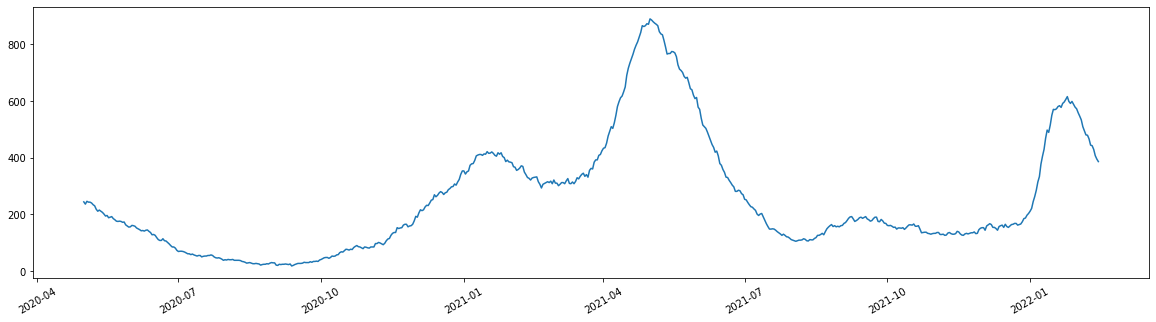

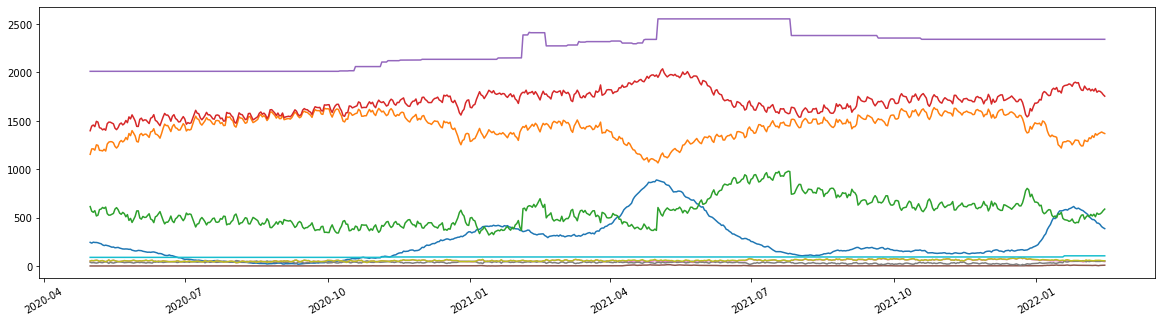

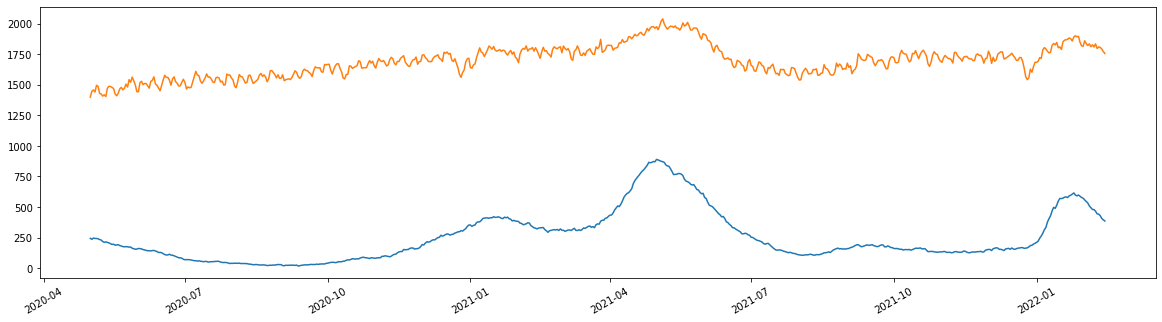

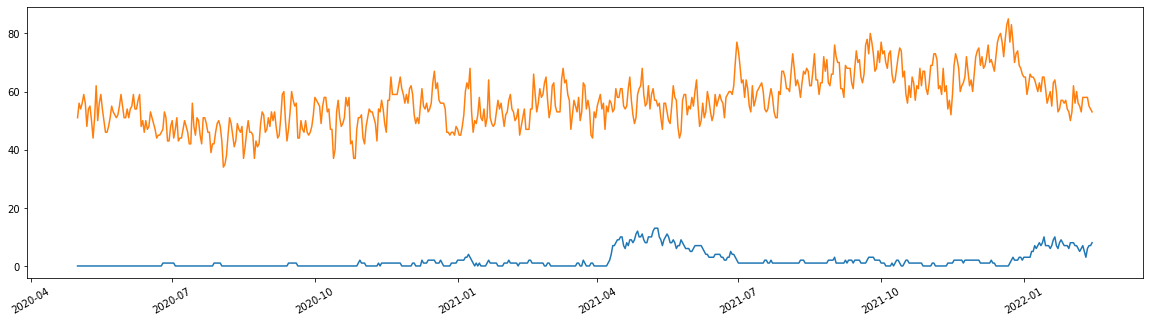

In [41]:
plt.plot(data[0:655]['adult_icu_crci_patients'])
plt.xticks(rotation = 30)
plt.show()

plt.plot(data[0:655])
plt.xticks(rotation = 30)
plt.show()


plt.plot(data.iloc[: , [0, 3]])
plt.xticks(rotation = 30)
plt.show()

plt.plot(data.iloc[: , [5, 8]])
plt.xticks(rotation = 30)
plt.show()

In [49]:
pd.Series.describe(data.iloc[: , [0, 3, 5, 8]])

# newdata = data[['date','adult_icu_crci_patients', 'total_adult_icu_patients', 'ped_icu_crci_patients', 'total_ped_icu_patients']].copy()
# pd.Series.describe(newdata)
# newdata.head(newdata)
# pd.Series.describe(data[1])
# data.head(data['date'])


,adult_icu_crci_patients,total_adult_icu_patients,ped_icu_crci_patients,total_ped_icu_patients
count,655.000000,655.000000,655.000000,655.000000
mean,251.783206,1691.693130,1.885496,56.813740
std,204.279555,127.422515,2.787700,8.847094
min,18.000000,1398.000000,0.000000,34.000000
25%,114.500000,1594.000000,0.000000,51.000000
50%,172.000000,1692.000000,1.000000,56.000000
75%,349.500000,1772.000000,2.000000,62.000000
max,889.000000,2038.000000,13.000000,85.000000


In [50]:
pd.Series.head(data.iloc[: , [0, 3, 5, 8]])

,adult_icu_crci_patients,total_adult_icu_patients,ped_icu_crci_patients,total_ped_icu_patients
date,,,,
2020-05-01,244,1398,0,51
2020-05-02,236,1446,0,56
2020-05-03,246,1457,0,54
2020-05-04,243,1440,0,56
2020-05-05,243,1495,0,59


In [45]:
# new = data.iloc[: , [0, 6, 7]].copy() 
# newdata = pd.Series.DataFrame([data.date, data.adult_icu_crci_patients, data.total_adult_icu_patients, data.ped_icu_crci_patients, data.total_ped_icu_patients]).transpose()


In [46]:
# plt.plot(data[0:655]['adult_icu_crci_patients''available_adult_icu_beds''total_adult_icu_patients'])
# plt.xticks(rotation = 30)
# plt.show()

In [47]:

# Code
# import pandas as pd
# from pandas import read_csv
# from patsy import dmatrices
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# import statsmodels.discrete.discrete_model as sm
# from pylab import rcParams
# rcParams['figure.figsize'] = 20, 5
# #filepath ="C:\Users\Jneny\Desktop\820\datasets\icu_beds.csv"
# #dataset = pd.read_csv(filepath, header = 0, sep="," )
# ​
# data = read_csv(r"C:\Users\Jneny\Desktop\820\datasets\icu_beds.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
# print(type(data))
# data.info()
# #data.describe()
# data.head()
# #for x in data[]:
    
    
# data.describe(data['adult_icu_crci_patients'])
# plt.plot(data[0:655]['adult_icu_crci_patients'])
# plt.xticks(rotation = 30)
# plt.show()

# ​
